In [1]:
from time import time as get_time
from utilities import fun_name, generate_array

from matplotlib import pyplot as plt

from sorts.bubble_sort import bubble_sort
from sorts.shaker_sort import shaker_sort
from sorts.comb_sort import comb_sort
from sorts.insertion_sort import insertion_sort
from sorts.selection_sort import selection_sort
from sorts.merge_sort import merge_sort
from sorts.quick_sort import quick_sort
from sorts.heap_sort import heap_sort

In [2]:
def get_top(results):
    return sorted(list(results.items()), key=lambda r: r[1][-1][-1])

def plot_top(top, unique_perc):
    fig = plt.figure(figsize=(16, 8))
    plt.title('Sorting algorithms speed comparison\n'
              + 'unique_perc = %s' % unique_perc, fontsize=20)
    
    colors = ['r', '#FF4500', 'm', 'b', '#1E90FF', 'g', '#9ACD32', '#999999']
    for i, (sort_fun, rs) in enumerate(top):
        sizes, _, times = zip(*rs)
        plt.plot(sizes, times,
                 linestyle = '-',
                 marker = 'o',
                 color=colors[i % len(colors)],
                 label=sort_fun)

    plt.xlabel('array_size', fontsize=20)
    plt.ylabel('time', fontsize=20)
    plt.grid(True)
    plt.legend(loc=0, fontsize=20)

    plt.show()

In [3]:
# TODO: calc avg speed over multiple arrays
# TODO: add partially sorted feature
def test_speed(sort_funs, array_sizes, unique_perc):
    print('SPEED TEST')
    print('SORT FUNS: %s' % list(map(fun_name, sort_funs)))
    print('UNIQUE PERCENTAGE: %s' % unique_perc)
     
    results = { fun_name(sort_fun) : [] for sort_fun in sort_funs }
    
    for array_size in array_sizes:
        print('\nARRAY SIZE: %s' % array_size)
        
        unique_count = int(array_size * unique_perc)
        lb = -(unique_count // 2) + (unique_count % 2 == 0)
        rb = unique_count // 2
        print('UNIQUE COUNT: %s' % unique_count)
        
        b = generate_array(array_size, lb, rb)
        for sort_fun in sort_funs:
            print('SORT: %s' % fun_name(sort_fun))
            
            a = b[:]

            start = get_time()
            sort_fun(a)
            end = get_time()

            results[fun_name(sort_fun)].append((array_size, unique_count, end - start))

            print('TIME: %s' % results[fun_name(sort_fun)][-1][-1])
        
        top = sorted([(sort_fun, results[sort_fun][-1][-1]) for sort_fun in results], key=lambda r: r[1])
        print('\nTOP:')
        for r in top:
            print('%s: %s' % r)
    
    print('\nSPEED TEST DONE!')
    return results

In [4]:
sort_funs = [
    quick_sort,
    heap_sort,
    comb_sort,
    
    merge_sort,
    
    selection_sort,
    insertion_sort,
    shaker_sort,
    bubble_sort,
]

array_sizes = [
    int(1e3),
    int(5e3),
    int(1e4),
    int(5e4),
    
    int(1e5),   
    int(3e5),
    int(5e5),
    
    int(8e5),
    int(1e6),
]

unique_perc_1 = 1

In [5]:
results_1 = test_speed(sort_funs[:3], array_sizes[:], unique_perc_1)

SPEED TEST
SORT FUNS: ['quick_sort', 'heap_sort', 'comb_sort']
UNIQUE PERCENTAGE: 1

ARRAY SIZE: 1000
UNIQUE COUNT: 1000
SORT: quick_sort
TIME: 0.004603862762451172
SORT: heap_sort
TIME: 0.006575584411621094
SORT: comb_sort
TIME: 0.005187511444091797

TOP:
quick_sort: 0.004603862762451172
comb_sort: 0.005187511444091797
heap_sort: 0.006575584411621094

ARRAY SIZE: 5000
UNIQUE COUNT: 5000
SORT: quick_sort
TIME: 0.016641616821289062
SORT: heap_sort
TIME: 0.032937049865722656
SORT: comb_sort
TIME: 0.028188705444335938

TOP:
quick_sort: 0.016641616821289062
comb_sort: 0.028188705444335938
heap_sort: 0.032937049865722656

ARRAY SIZE: 10000
UNIQUE COUNT: 10000
SORT: quick_sort
TIME: 0.03536868095397949
SORT: heap_sort
TIME: 0.07520651817321777
SORT: comb_sort
TIME: 0.07632827758789062

TOP:
quick_sort: 0.03536868095397949
heap_sort: 0.07520651817321777
comb_sort: 0.07632827758789062

ARRAY SIZE: 50000
UNIQUE COUNT: 50000
SORT: quick_sort
TIME: 0.21412324905395508
SORT: heap_sort
TIME: 0.5049

In [6]:
results_2 = test_speed([sort_funs[3]], array_sizes[:], unique_perc_1)

SPEED TEST
SORT FUNS: ['merge_sort']
UNIQUE PERCENTAGE: 1

ARRAY SIZE: 1000
UNIQUE COUNT: 1000
SORT: merge_sort
TIME: 0.008248090744018555

TOP:
merge_sort: 0.008248090744018555

ARRAY SIZE: 5000
UNIQUE COUNT: 5000
SORT: merge_sort
TIME: 0.08002066612243652

TOP:
merge_sort: 0.08002066612243652

ARRAY SIZE: 10000
UNIQUE COUNT: 10000
SORT: merge_sort
TIME: 0.10526466369628906

TOP:
merge_sort: 0.10526466369628906

ARRAY SIZE: 50000
UNIQUE COUNT: 50000
SORT: merge_sort
TIME: 1.0646476745605469

TOP:
merge_sort: 1.0646476745605469

ARRAY SIZE: 100000
UNIQUE COUNT: 100000
SORT: merge_sort
TIME: 3.912712335586548

TOP:
merge_sort: 3.912712335586548

ARRAY SIZE: 300000
UNIQUE COUNT: 300000
SORT: merge_sort
TIME: 32.93944501876831

TOP:
merge_sort: 32.93944501876831

ARRAY SIZE: 500000
UNIQUE COUNT: 500000
SORT: merge_sort
TIME: 106.61913561820984

TOP:
merge_sort: 106.61913561820984

ARRAY SIZE: 800000
UNIQUE COUNT: 800000
SORT: merge_sort
TIME: 264.69973492622375

TOP:
merge_sort: 264.69973

In [7]:
results_3 = test_speed(sort_funs[4:], array_sizes[:4], unique_perc_1)

SPEED TEST
SORT FUNS: ['selection_sort', 'insertion_sort', 'shaker_sort', 'bubble_sort']
UNIQUE PERCENTAGE: 1

ARRAY SIZE: 1000
UNIQUE COUNT: 1000
SORT: selection_sort
TIME: 0.060007572174072266
SORT: insertion_sort
TIME: 0.10774564743041992
SORT: shaker_sort
TIME: 0.10649633407592773
SORT: bubble_sort
TIME: 0.1307821273803711

TOP:
selection_sort: 0.060007572174072266
shaker_sort: 0.10649633407592773
insertion_sort: 0.10774564743041992
bubble_sort: 0.1307821273803711

ARRAY SIZE: 5000
UNIQUE COUNT: 5000
SORT: selection_sort
TIME: 1.3721442222595215
SORT: insertion_sort
TIME: 2.0697672367095947
SORT: shaker_sort
TIME: 2.5526957511901855
SORT: bubble_sort
TIME: 3.240238904953003

TOP:
selection_sort: 1.3721442222595215
insertion_sort: 2.0697672367095947
shaker_sort: 2.5526957511901855
bubble_sort: 3.240238904953003

ARRAY SIZE: 10000
UNIQUE COUNT: 10000
SORT: selection_sort
TIME: 5.256022214889526
SORT: insertion_sort
TIME: 8.394991874694824
SORT: shaker_sort
TIME: 10.358713150024414
SO

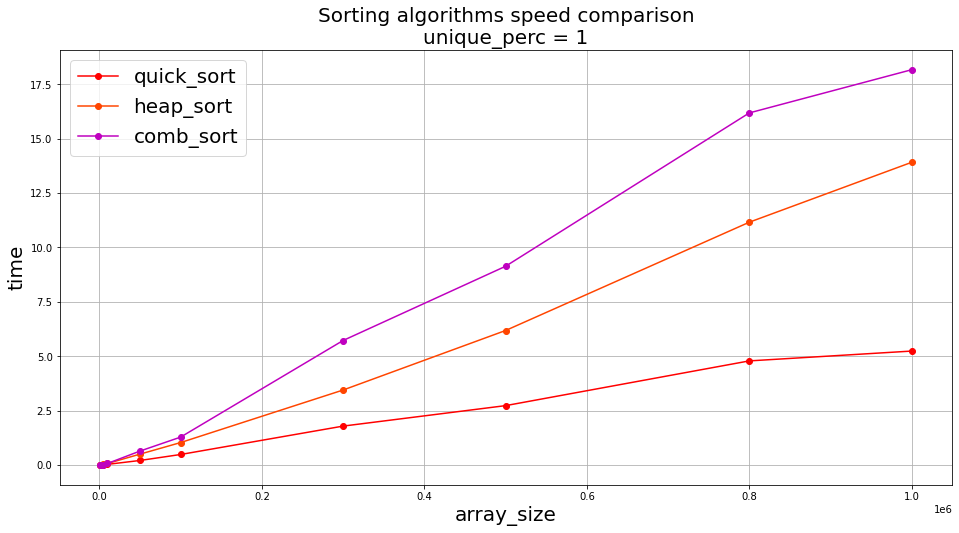

In [8]:
top_1 = get_top(results_1)
plot_top(top_1, unique_perc_1)

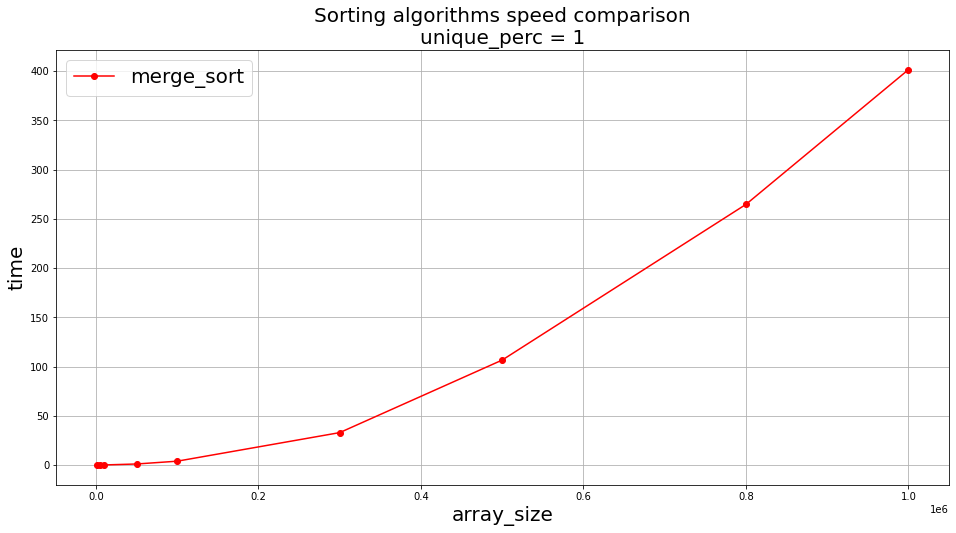

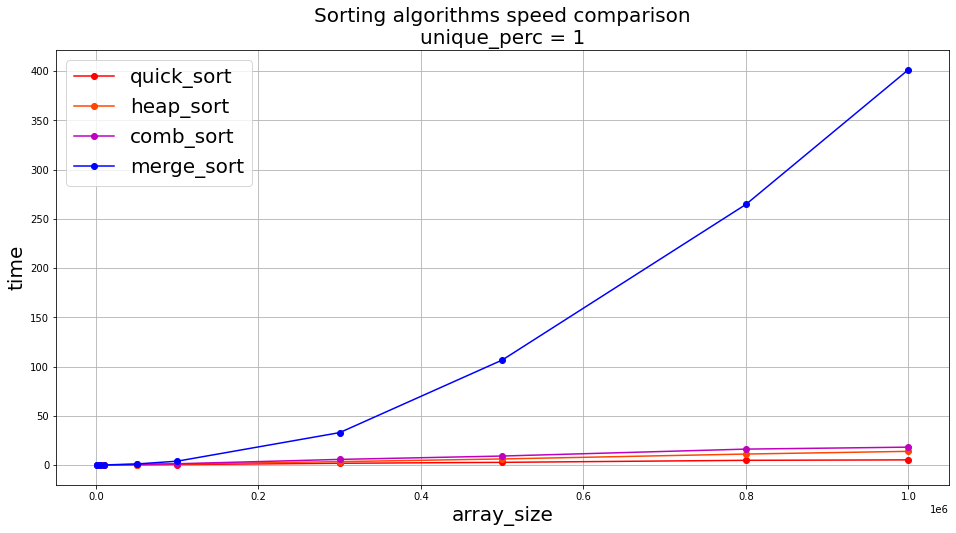

In [9]:
top_2 = get_top(results_2)
plot_top(top_2, unique_perc_1)
plot_top(top_1 + top_2, unique_perc_1)

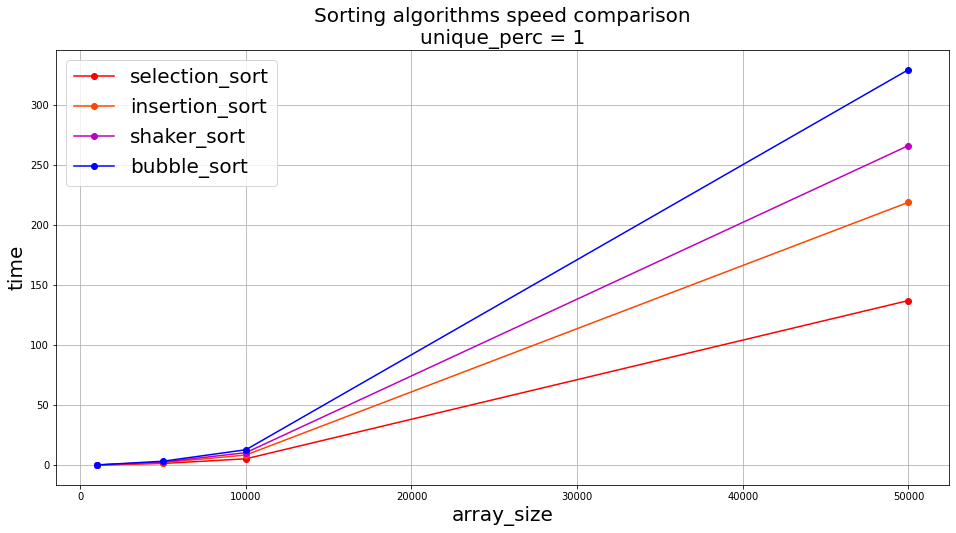

In [10]:
top_3 = get_top(results_3)
plot_top(top_3, unique_perc_1)

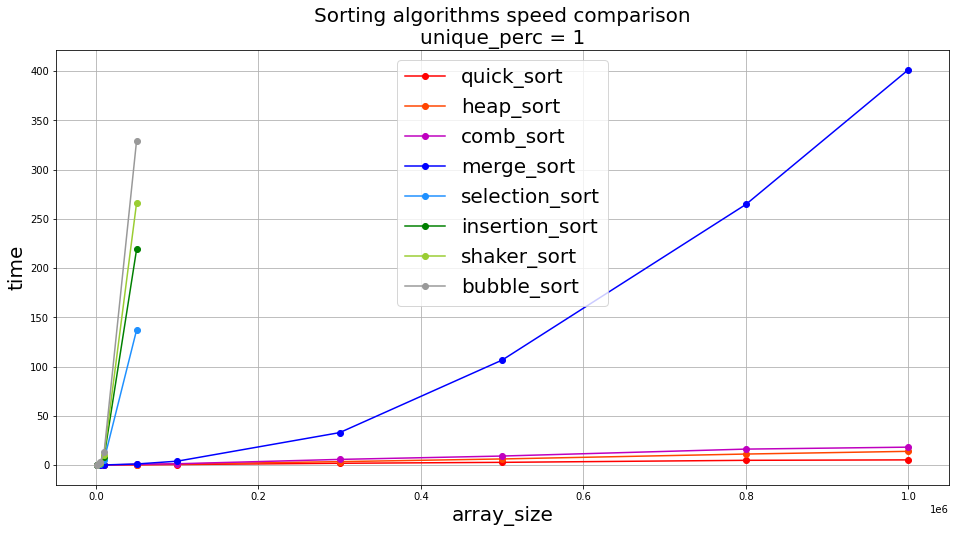

In [11]:
plot_top(top_1 + top_2 + top_3, unique_perc_1)

In [12]:
unique_perc_2 = 0.001
results_1_2 = test_speed(sort_funs[:3], array_sizes[:], unique_perc_2)

SPEED TEST
SORT FUNS: ['quick_sort', 'heap_sort', 'comb_sort']
UNIQUE PERCENTAGE: 0.001

ARRAY SIZE: 1000
UNIQUE COUNT: 1
SORT: quick_sort
TIME: 0.007983684539794922
SORT: heap_sort
TIME: 0.000989675521850586
SORT: comb_sort
TIME: 0.0028209686279296875

TOP:
heap_sort: 0.000989675521850586
comb_sort: 0.0028209686279296875
quick_sort: 0.007983684539794922

ARRAY SIZE: 5000
UNIQUE COUNT: 5
SORT: quick_sort
TIME: 0.019303321838378906
SORT: heap_sort
TIME: 0.028753042221069336
SORT: comb_sort
TIME: 0.02136993408203125

TOP:
quick_sort: 0.019303321838378906
comb_sort: 0.02136993408203125
heap_sort: 0.028753042221069336

ARRAY SIZE: 10000
UNIQUE COUNT: 10
SORT: quick_sort
TIME: 0.0349879264831543
SORT: heap_sort
TIME: 0.06766319274902344
SORT: comb_sort
TIME: 0.051468849182128906

TOP:
quick_sort: 0.0349879264831543
comb_sort: 0.051468849182128906
heap_sort: 0.06766319274902344

ARRAY SIZE: 50000
UNIQUE COUNT: 50
SORT: quick_sort
TIME: 0.20034146308898926
SORT: heap_sort
TIME: 0.436652660369

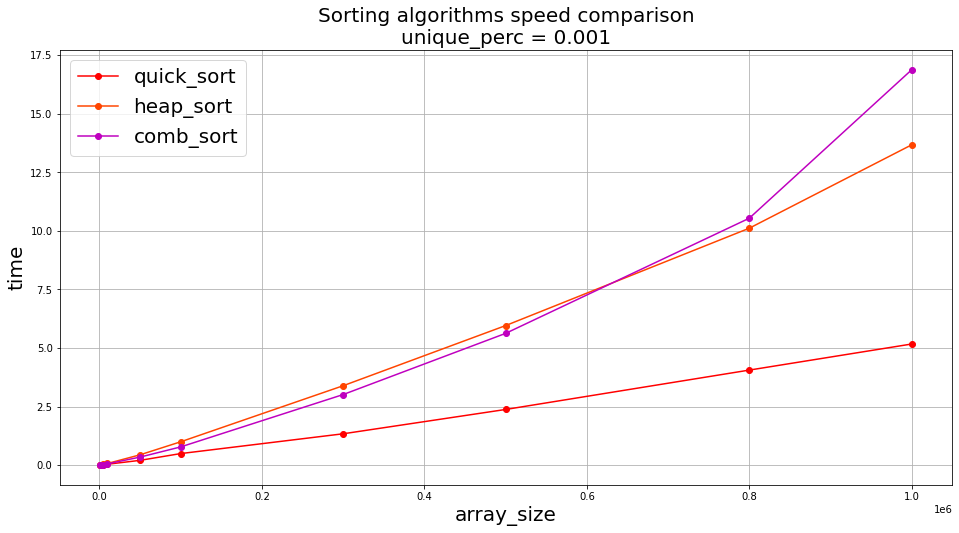

In [13]:
top_1_2 = get_top(results_1_2)
plot_top(top_1_2, unique_perc_2)

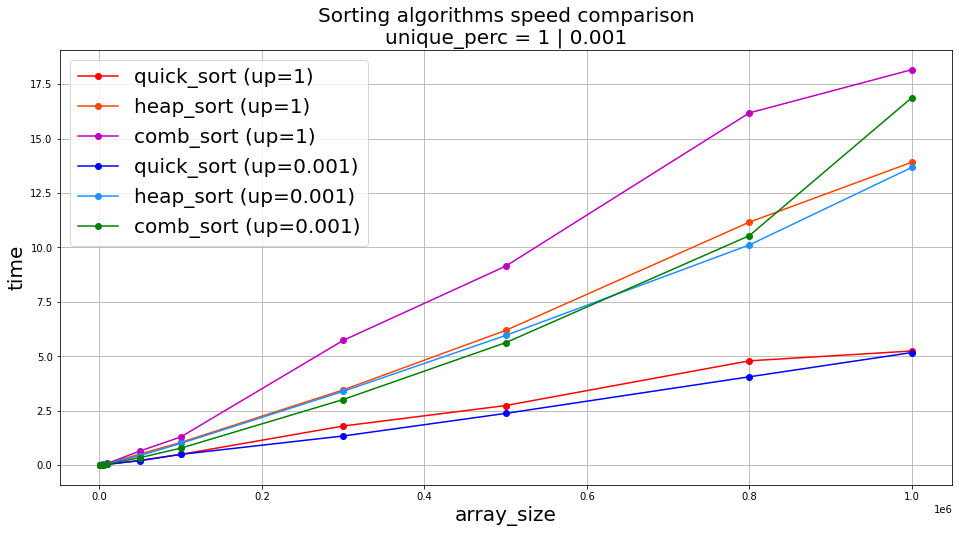

In [14]:
plot_top(list(map(lambda t: (t[0] + ' (up=%s)' % unique_perc_1, t[1]), top_1))
         + list(map(lambda t: (t[0] + ' (up=%s)' % unique_perc_2, t[1]), top_1_2)),
         '%s | %s' % (unique_perc_1, unique_perc_2))